In [1]:
import pandas as pd;
training_data = pd.read_csv('epl-training.csv'); 
training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/2000,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/2000,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/2000,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/2000,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [2]:
home_teams = set(training_data['HomeTeam']);
away_teams = set(training_data['AwayTeam']);
unique_teams = list(home_teams.union(away_teams));
print(unique_teams);

['Cardiff', 'Luton', 'Hull', 'Sheffield United', 'Chelsea', 'Brentford', 'Leicester', 'Sunderland', 'Burnley', 'Reading', 'QPR', 'Portsmouth', 'Newcastle', 'Wigan', 'Birmingham', 'Stoke', 'Norwich', 'Bournemouth', 'Southampton', 'Man United', 'West Brom', 'Derby', 'Wolves', 'Watford', nan, 'Crystal Palace', 'West Ham', 'Middlesbrough', 'Blackburn', 'Fulham', 'Swansea', 'Blackpool', 'Ipswich', 'Bolton', 'Everton', 'Liverpool', 'Arsenal', 'Tottenham', 'Bradford', 'Leeds', "Nott'm Forest", 'Charlton', 'Brighton', 'Coventry', 'Huddersfield', 'Aston Villa', 'Man City']


# 1. Exploration:
Feature Analysis: Identify important categorical and numerical features, such as team names, match location, scores, etc.
Feature Engineering: Convert categorical features (like team names) to binary indicators. Compute new statistics (e.g., average goals scored/conceded over past matches) for each team.
Data Visualization: Examine distributions, correlations, and time-series patterns.

In [3]:
# Convert 'Date' column to datetime format
training_data['Date'] = pd.to_datetime(training_data['Date'], dayfirst=True);
# Sort the data by date and reset index
training_data = training_data.sort_values('Date').reset_index(drop=True);
# Define columns to extract stats for rolling averages
cum_averages = ['FTHG', 'FTAG', 'HST', 'AST', 'HC', 'AC'];

In [4]:
# Get unique team names from HomeTeam and AwayTeam columns
team_names = pd.concat([training_data['HomeTeam'], training_data['AwayTeam']]).dropna().unique();
# Initialize team_stats dictionary to store stats for each team
team_stats = {team: {col: [] for col in cum_averages} for team in team_names if team != "nan"};

In [5]:
# Loop through each row to extract and append stats for each team
for index, row in training_data.iterrows():
    home_team = row['HomeTeam'];
    away_team = row['AwayTeam'];

# Ensure both home_team and away_team are in the team_stats dictionary
    if home_team in team_stats and away_team in team_stats:
# Home team stats
        team_stats[home_team]['FTHG'].append(row['FTHG']);  # Goals scored by home team
        team_stats[home_team]['HST'].append(row['HST']);    # Shots on target by home team
        team_stats[home_team]['HC'].append(row['HC']);      # Corners by home team
# Away team stats
        team_stats[away_team]['FTAG'].append(row['FTAG']);  # Goals scored by away team
        team_stats[away_team]['AST'].append(row['AST']);    # Shots on target by away team
        team_stats[away_team]['AC'].append(row['AC']);      # Corners by away team
    else: 
        print(f"Skipping row {index} due to missing team in team_stats"); # if team doesn't 
# Print stats for each team
print("Team Statistics:")
for team, stats in team_stats.items():
    print(f"Team: {team}, Stats: {stats}");

Skipping row 9220 due to missing team in team_stats
Team Statistics:
Team: Charlton, Stats: {'FTHG': [4.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 4.0, 1.0, 3.0, 0.0, 3.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 4.0, 2.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 3.0, 0.0, 0.0, 4.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 0.0, 1.0, 1.0, 1.0, 4.0, 0.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 2.0, 3.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 4.0, 2.0, 1.0, 0.0, 1.0, 0.0], 'FTAG': [0.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 4.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0

In [6]:
import numpy as np
# Initialize a dictionary to store derived metrics
team_metrics = {}
for team, stats in team_stats.items():
    # Calculate average metrics (handle empty lists to avoid division by zero)
    avg_fthg = np.mean(stats['FTHG']) if stats['FTHG'] else 0;
    avg_ftag = np.mean(stats['FTAG']) if stats['FTAG'] else 0;
    avg_hst = np.mean(stats['HST']) if stats['HST'] else 0;
    avg_ast = np.mean(stats['AST']) if stats['AST'] else 0;
    avg_hc = np.mean(stats['HC']) if stats['HC'] else 0;
    avg_ac = np.mean(stats['AC']) if stats['AC'] else 0;
    # Store metrics
    team_metrics[team] = {
        'Avg_HomeGoals': avg_fthg,
        'Avg_AwayGoals': avg_ftag,
        'Avg_HomeShots': avg_hst,
        'Avg_AwayShots': avg_ast,
        'Avg_HomeCorners': avg_hc,
        'Avg_AwayCorners': avg_ac,
    }
# Display metrics for each team
for team, metrics in team_metrics.items():
    print(f"Team: {team}, Metrics: {metrics}");

Team: Charlton, Metrics: {'Avg_HomeGoals': 1.3458646616541354, 'Avg_AwayGoals': 0.9172932330827067, 'Avg_HomeShots': 5.804511278195489, 'Avg_AwayShots': 4.150375939849624, 'Avg_HomeCorners': 5.496240601503759, 'Avg_AwayCorners': 4.654135338345864}
Team: Chelsea, Metrics: {'Avg_HomeGoals': 2.038961038961039, 'Avg_AwayGoals': 1.5739130434782609, 'Avg_HomeShots': 7.3441558441558445, 'Avg_AwayShots': 5.956521739130435, 'Avg_HomeCorners': 6.891774891774892, 'Avg_AwayCorners': 5.8826086956521735}
Team: Coventry, Metrics: {'Avg_HomeGoals': 0.7368421052631579, 'Avg_AwayGoals': 1.1578947368421053, 'Avg_HomeShots': 5.0, 'Avg_AwayShots': 4.315789473684211, 'Avg_HomeCorners': 6.684210526315789, 'Avg_AwayCorners': 4.157894736842105}
Team: Derby, Metrics: {'Avg_HomeGoals': 0.9649122807017544, 'Avg_AwayGoals': 0.6140350877192983, 'Avg_HomeShots': 4.508771929824562, 'Avg_AwayShots': 3.5964912280701755, 'Avg_HomeCorners': 4.701754385964913, 'Avg_AwayCorners': 3.6666666666666665}
Team: Leeds, Metrics: {

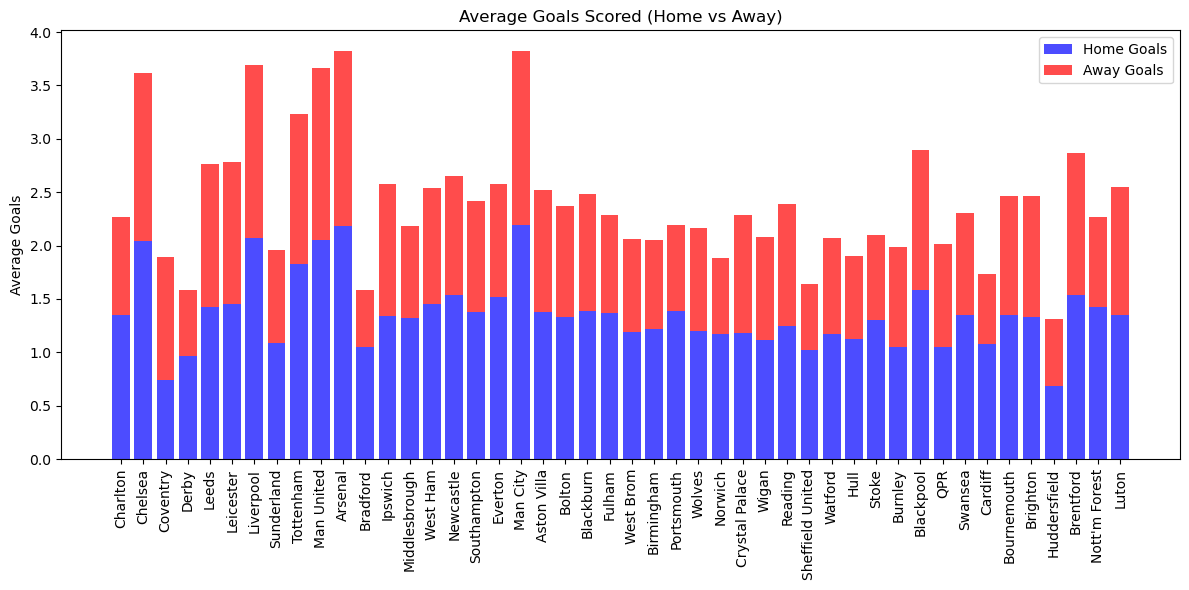

In [7]:
import matplotlib.pyplot as plt
teams = list(team_metrics.keys());
avg_home_goals = [team_metrics[team]['Avg_HomeGoals'] for team in teams];
avg_away_goals = [team_metrics[team]['Avg_AwayGoals'] for team in teams];

# Plot average goals scored
plt.figure(figsize=(12, 6));
plt.bar(teams, avg_home_goals, color='blue', alpha=0.7, label='Home Goals');
plt.bar(teams, avg_away_goals, color='red', alpha=0.7, label='Away Goals', bottom=avg_home_goals);
plt.xticks(rotation=90);
plt.ylabel('Average Goals');
plt.title('Average Goals Scored (Home vs Away)');
plt.legend();
plt.tight_layout();
plt.show();

# Which teams dominate in scoring or defense?

In [8]:
training_data['GoalDifference'] = training_data['FTHG'] - training_data['FTAG'];
print(training_data[['HomeTeam', 'AwayTeam', 'GoalDifference']].head());
 

   HomeTeam       AwayTeam  GoalDifference
0  Charlton       Man City             4.0
1   Chelsea       West Ham             2.0
2  Coventry  Middlesbrough            -2.0
3     Derby    Southampton             0.0
4     Leeds        Everton             2.0


In [9]:
training_data['TotalGoals'] = training_data['FTHG'] + training_data['FTAG'];
high_scoring = training_data[training_data['TotalGoals'] > 10];
print(high_scoring[['Date', 'HomeTeam', 'AwayTeam', 'TotalGoals']]);
 

           Date    HomeTeam AwayTeam  TotalGoals
2730 2007-09-29  Portsmouth  Reading        11.0


In [10]:
avg_goals = training_data.groupby('HomeTeam')['FTHG'].mean().rename("Avg_HomeGoals");
avg_conceded = training_data.groupby('AwayTeam')['FTAG'].mean().rename("Avg_AwayConceded");
print(avg_goals.head(), avg_conceded.head());

HomeTeam
Arsenal        2.181818
Aston Villa    1.381188
Birmingham     1.218045
Blackburn      1.382775
Blackpool      1.578947
Name: Avg_HomeGoals, dtype: float64 AwayTeam
Arsenal        1.641304
Aston Villa    1.141089
Birmingham     0.834586
Blackburn      1.095694
Blackpool      1.315789
Name: Avg_AwayConceded, dtype: float64


# Referee influence 

In [11]:
ref_stats = training_data.groupby('Referee').agg({
    'HF': 'mean',
    'AF': 'mean',
    'HY': 'mean',
    'AY': 'mean',
    'HR': 'mean',
    'AR': 'mean'
});
print(ref_stats.sort_values(by='HF', ascending=False).head()); 

                       HF    AF   HY   AY   HR   AR
Referee                                            
J. T. Winter         28.0  29.0  4.0  5.0  0.0  2.0
Andy D'Urso          22.0  22.0  5.0  3.0  1.0  0.0
E. K. Wolstenholme   21.0  14.0  0.0  3.0  0.0  1.0
S. W. Dunn           20.5  18.0  1.5  3.5  0.0  0.0
†C Foy               20.0  17.0  0.0  0.0  0.0  0.0


In [12]:
outcomes_by_ref = training_data.groupby(['Referee', 'FTR']).size().unstack(fill_value=0);
print(outcomes_by_ref);

FTR            A   D    H
Referee                  
A D'Urso      15  18   23
A Madley      32  22   45
A Marriner   126  98  168
A Moss         1   0    0
A Taylor     124  92  164
...          ...  ..  ...
†H Webb        0   0    1
†M Atkinson    0   0    1
†N Barry       0   0    1
†S Dunn        0   0    1
†U Rennie      0   1    0

[185 rows x 3 columns]


 Average Fouls and Cards per Referee 

In [13]:
import matplotlib.pyplot as plt

# Extract and sort data for visualization
top_ref_stats = ref_stats.sort_values(by='HF', ascending=False).head(10)  # Top 10 referees with the highest home fouls

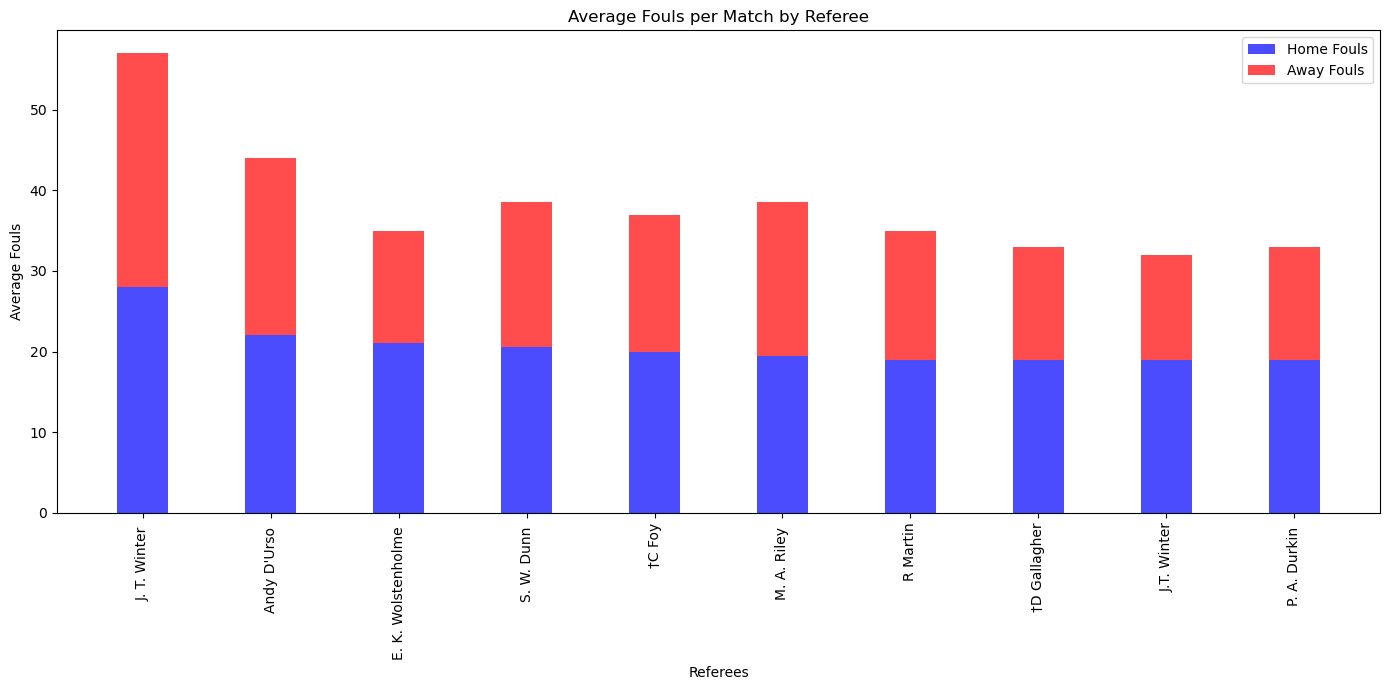

In [14]:
# Plotting fouls
plt.figure(figsize=(14, 7))
x = range(len(top_ref_stats))

plt.bar(x, top_ref_stats['HF'], width=0.4, label='Home Fouls', color='blue', alpha=0.7)
plt.bar(x, top_ref_stats['AF'], width=0.4, label='Away Fouls', color='red', alpha=0.7, bottom=top_ref_stats['HF'])

plt.xticks(x, top_ref_stats.index, rotation=90)
plt.xlabel('Referees')
plt.ylabel('Average Fouls')
plt.title('Average Fouls per Match by Referee')
plt.legend()
plt.tight_layout()
plt.show()

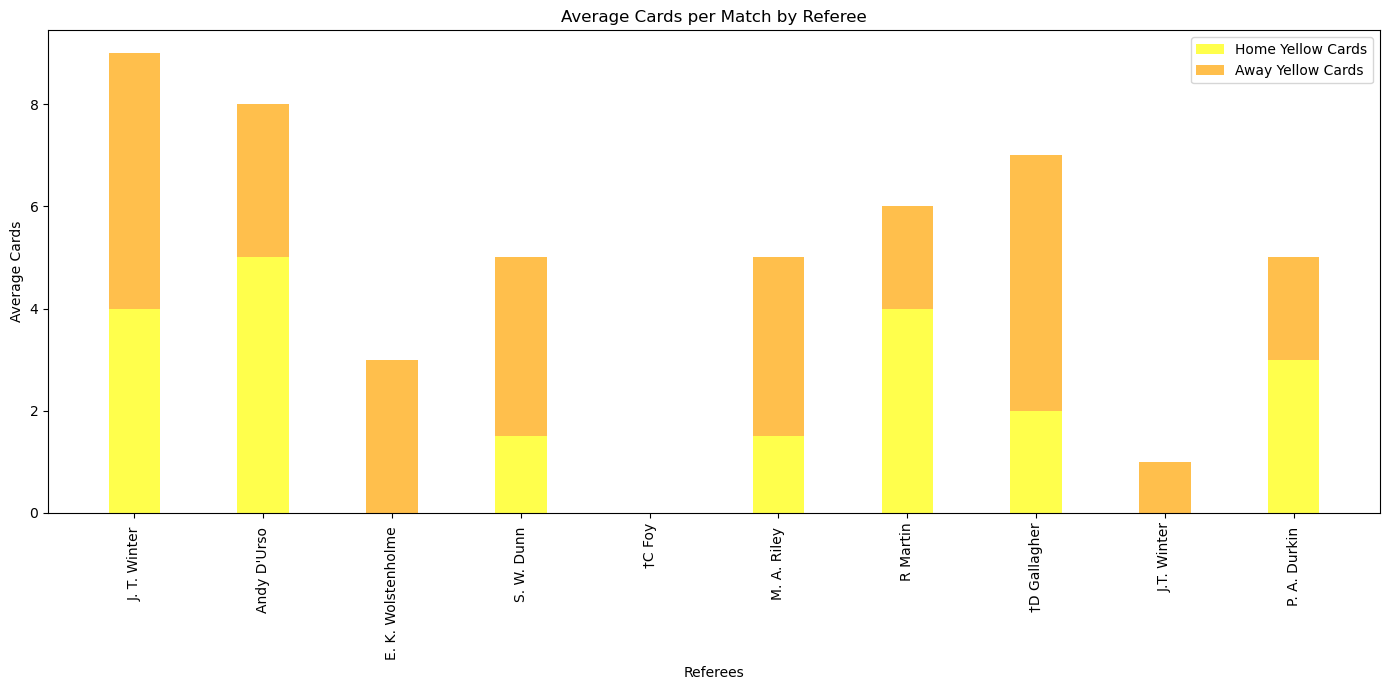

In [15]:
# Plotting cards
plt.figure(figsize=(14, 7))
x = range(len(top_ref_stats))

plt.bar(x, top_ref_stats['HY'], width=0.4, label='Home Yellow Cards', color='yellow', alpha=0.7)
plt.bar(x, top_ref_stats['AY'], width=0.4, label='Away Yellow Cards', color='orange', alpha=0.7, bottom=top_ref_stats['HY'])

plt.xticks(x, top_ref_stats.index, rotation=90)
plt.xlabel('Referees')
plt.ylabel('Average Cards')
plt.title('Average Cards per Match by Referee')
plt.legend()
plt.tight_layout()
plt.show()

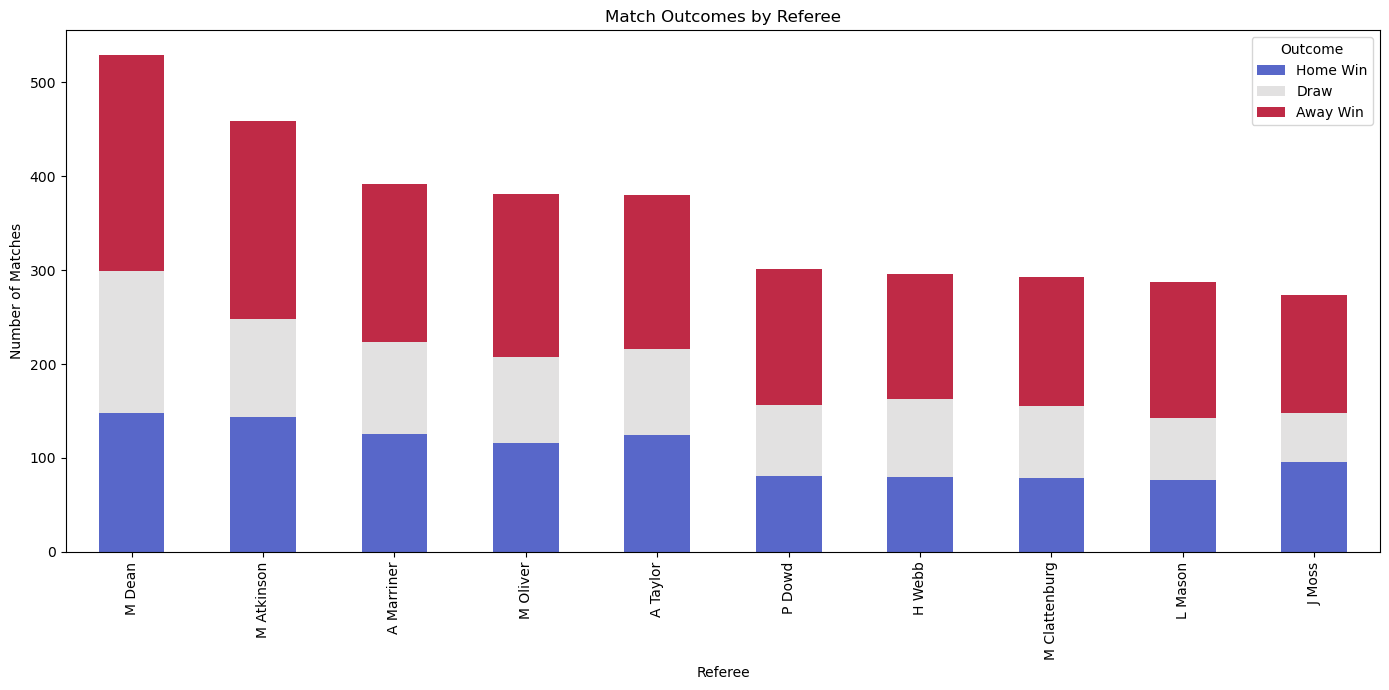

In [16]:
# Select top referees based on total matches officiated
top_outcomes_by_ref = outcomes_by_ref.sum(axis=1).sort_values(ascending=False).head(10).index
outcomes_subset = outcomes_by_ref.loc[top_outcomes_by_ref]

# Plotting match outcomes
outcomes_subset.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm', alpha=0.85)

plt.title('Match Outcomes by Referee')
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.legend(title='Outcome', labels=['Home Win', 'Draw', 'Away Win'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Home vs Away Advantage 

In [17]:
home_wins = training_data[training_data['FTR'] == 'H'].shape[0] / training_data.shape[0];
away_wins = training_data[training_data['FTR'] == 'A'].shape[0] / training_data.shape[0];
draws = training_data[training_data['FTR'] == 'D'].shape[0] / training_data.shape[0];
print(f"Home Win Rate: {home_wins:.2f}, Away Win Rate: {away_wins:.2f}, Draw Rate: {draws:.2f}");

Home Win Rate: 0.46, Away Win Rate: 0.29, Draw Rate: 0.25


Analyze whether home teams takes more shots and corners 

In [18]:
avg_shots = training_data[['HS', 'AS']].mean();
avg_corners = training_data[['HC', 'AC']].mean();
print(f"Avg Shots - Home: {avg_shots['HS']:.2f}, Away: {avg_shots['AS']:.2f}");
print(f"Avg Corners - Home: {avg_corners['HC']:.2f}, Away: {avg_corners['AC']:.2f}");

Avg Shots - Home: 13.62, Away: 10.76
Avg Corners - Home: 6.25, Away: 5.04


# Disciplinary Analysis 

# 2.Methodology: 
Approach: Establish prior probabilities based on historical performance data. Explore additional data sources if necessary to enrich the training data.
Model Choice: Use algorithms from Scikit-learn (e.g., logistic regression, random forest, etc.) to predict match outcomes.
Experimentation: Implement different models and evaluate performance to identify the best approach.

# 4. Model Evaluation: 
Use cross-validation and metrics like accuracy, F1-score, or log-loss for probabilistic outputs.

# 5. Results 
Model comparison, show performance metrics dor each model variation. 

# 6. Final predictions
Generate trained model to generate predictions. 

# 7. Conclusion
Summarize findings, highlight any challenges, and proposed potential improvements. 